# Visualization with yellowbrick

**Yellowbrick** ist eine Visualisierungsbibliothek für Machine Learning Modelle. Yellowbrick erweitert die *Scikit-Learn* API, um die Modellauswahl und Hyperparameteroptimierung zu erleichtern. Es baut auf *Matplotlib* auf. Yellowbrick stellt für textspezifische Visualisierungsprogramme das Modul `yellowbrick.text` zur Verfügung. <br> 

**Guidelines**: https://www.scikit-yb.org/en/latest/index.html


**Inhaltsverzeichnis**:<br>
1. Das Korpus
2. FreqDistVisualizer
3. T-SNE
4. UMAP
5. Dispersion Plot

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from yellowbrick.text import DispersionPlot, FreqDistVisualizer, TSNEVisualizer, UMAPVisualizer
from yellowbrick.style import set_palette
set_palette('paired')

## 1. Das Korpus

Es wird das kleine deutsche Wikikorpus von diesem <a href="https://github.com/realjanpaulus/german-corpora">Github-Repo</a> genutzt.

In [2]:
corpus = pd.read_csv("corpora/german_wiki_small.csv")
corpus.head(2)

,category,length,text,textlength
0,Computerspiel nach Plattform,184,"SWIV ist ein Shoot ' em up von Storm , erschie...",184
1,Computerspiel nach Plattform,342,Slayer ist ein Action-Rollenspiel des Entwickl...,342


In [3]:
vectorizer = TfidfVectorizer(lowercase=True)
features = vectorizer.fit_transform(corpus["text"])
labels = corpus.category

## 2. FreqDistVisualizer

Eine Methode zur Visualisierung der Häufigkeit von Tokens innerhalb von Korpora ist die **Häufigkeitsverteilung**. Eine Häufigkeitsverteilung gibt absteigend die Häufigkeit jedes Tokens im Text an. Die Verteilung unterliegt *Zipfs Gesetz*.

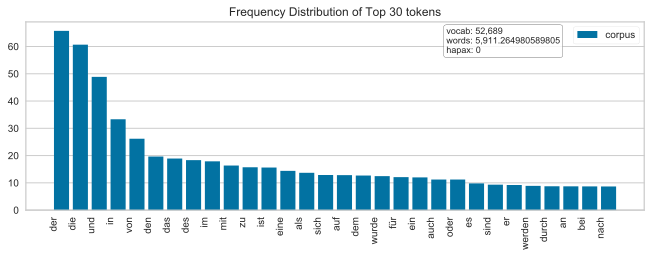

In [4]:
feature_names = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=feature_names, n=30, color="b", orient='v', size=(800, 250))
visualizer.fit(features)
visualizer.show()

## 3. T-SNE

Eine sehr beliebte Methode zur Visualisierung der Dokumentenähnlichkeit ist die Verwendung der *t-verteilten stochastischen Nachbareinbettung*, **t-SNE**. Scikit-learn implementiert diese Zerlegungsmethode mithilfe von `sklearn.manifold.TSNE`. t-SNE zerlegt hochdimensionale Dokumentvektoren in 2 Dimensionen, indem es Wahrscheinlichkeitsverteilungen der ursprünglichen sowie der zerlegten Dimensionalität verwendet. Durch die Zerlegung ist t-SNE in der Lage, ähnliche Dokumente effektiv zu clustern. Durch die Zerlegung in 2 oder 3 Dimensionen können die Dokumente mit einem Streudiagramm visualisiert werden.

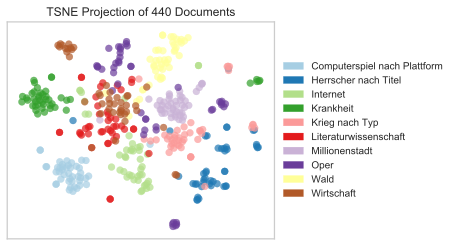

In [5]:
tsne = TSNEVisualizer(decompose_byint=50)
tsne.fit(features, labels)
tsne.show()

## 4. UMAP

**Uniform Manifold Approximation and Projection (UMAP)** ist eine Methode zur Reduzierung der nichtlinearen Dimensionalität, die sich gut zur Einbettung in zwei oder drei Dimensionen für die Visualisierung als Streudiagramm eignet. UMAP ist sehr effektiv für die Visualisierung von Clustern oder Gruppen von Datenpunkten und deren relativen Proximitäten. Die Methode leistet eine gute Arbeit beim Erlernen der lokalen Struktur innerhalb von Daten. Dabei versucht es, die ursprüunglichen Beziehungen zwischen den Gruppen zu erhalten.<br>

**Vorteile im Vergleich zu t-SNE**<br>
* schnell
* skalierbar 
* kann direkt auf Sparse-Matrizen angewendet werden (TruncatedSVD muss nicht als Vorverarbeitungsschritt ausgeführt werden) 
* unterstützt eine Vielzahl von Abstandsmaßen (ermöglichen einfache Exploration der Daten)

#### Metric: TF-IDF

/Users/jan/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


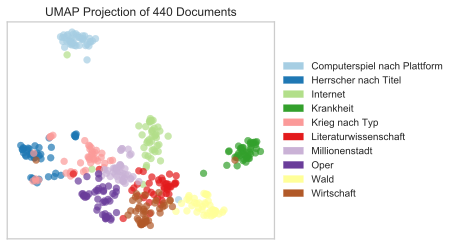

In [6]:
umap = UMAPVisualizer()
umap.fit(features, labels)
umap.show()

#### Metric: Cosine distance

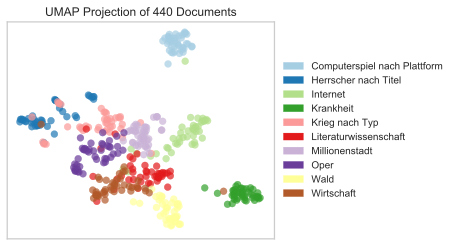

In [11]:
umap = UMAPVisualizer(metric="cosine")
umap.fit(features, labels)
umap.show()

## 5. Dispersion Plot

Die Bedeutung eines Wortes kann anhand seiner **Streuung** (engl. *Dispersion*) in einem Korpus abgewogen werden. Die lexikalische Streuung ist ein Maß für die Homogenität eines Wortes über Teile eines Korpus. Im **Dispersion Plot** wird aufgezeigt, wie häufig ein Wort im Korpus und an welcher Stelle es vorkommt.

/Users/jan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


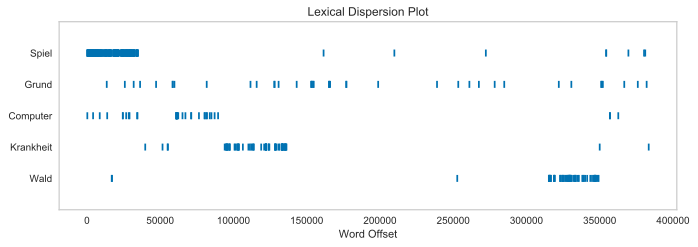

In [12]:
# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.text]

# Choose words whose occurence in the text will be plotted
target_words = ['Spiel', 'Grund', 'Computer', 'Krankheit', 'Wald']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words, colormap="colorblind", size=(800, 250))
visualizer.fit(text)
visualizer.show()

## 6. Boxplot (without yellowbrick)

Taken from <a href="https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/">Machine Learning Mastery Blog entry</a>.

In [15]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.864 (0.036)
>knn 0.928 (0.030)
>cart 0.820 (0.033)
>svm 0.922 (0.029)
>bayes 0.831 (0.040)


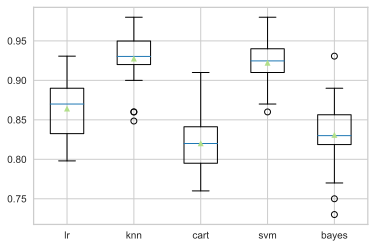

In [16]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()